<a href="https://colab.research.google.com/github/lordoz234/ML_Homework/blob/main/%D0%9F%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D1%82%D0%BE%D0%BA%D0%B0_%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D1%82%D0%B5%D0%BB%D0%B5%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание оттока пользователей

Имеется следующий набор данных:

1.   **ClientPeriod** - период пользования услугами компании
2.   **MonthlySpending** - траты клиента за месяц
3.   **TotalSpent** - общие траты клиента
4.   **Sex** - пол клиента
5.   **IsSeniorCitizen** - находится ли клиент в пожилом возрасте
6.   **HasPartner** - семейное положение
7.   **HasChild** - наличие детей
8.   **HasPhoneService** - наличие мобильного телефона
9.   **HasMultiplePhoneNumbers** - наличие нескольких телефонных номеров
10.  **HasOnlineBackup** - наличие облачных хранилищ у клиента
11.  **HasDeviceProtection** - наличие защиты устройства 
12.  **HasTechSupportAccess** - наличие доступа к технической поддержке
13.  **HasOnlineTV** - наличие стримингового сервиса
14.  **HasMovieSubscription** - наличие подписки в онлайн кинотеатре
15.  **HasContractPhone** - наличие контактного телефона
16.  **IsBillingPaperless** - является ли счет электронным
17.  **PaymentMethod** - метод оплаты

По этим данным необходимо предсказать отток пользователей. Целевой переменной явялется **Churn**, которая принимает одно из двух значений: **0** - клиент остался, **1** - клиент ушел


Предстоит научиться моделировать отток клиентов телеком компании. Эта задача очень важна на практике, и алгоритмы для ее решения используются в реальных телеком компаниях, ведь если мы знаем, что клиент собирается уйти от нас, то мы попытаться удержать его, предложив различные бонусы

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from tqdm import tqdm_notebook  
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("train.csv")

Посмотрим на признаки:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


Как видно из таблицы, поставлена задача *бинарной классификации*, состоящая в предсказании оттока пользователей

In [ ]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


#Обработка пропусков

Проверим наличие пропусков в датасете:

In [ ]:
data.isnull().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пропусков данный датасет не содержит, однако признак TotalSpent не является числовым

In [ ]:
data.query('TotalSpent == " "')

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


In [ ]:
data['TotalSpent'] = data['TotalSpent'].where(data['ClientPeriod'] > 0, data['MonthlySpending'])
data['ClientPeriod'] = data['ClientPeriod'].where(data['ClientPeriod'] > 0, 1)
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])

#Анализ данных

Разделим признаки на числовые и категориальные:

In [ ]:
cat_cols = [x for x in data.columns if data[x].dtype == 'object']
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64'] and x != 'Churn']
target_col = "Churn"
print("Категориальные признаки: ", ", ".join(cat_cols))
print("Числовые признаки: ", ", ".join(num_cols))
print("Целевой признак: ", target_col)

Категориальные признаки:  Sex, HasPartner, HasChild, HasPhoneService, HasMultiplePhoneNumbers, HasInternetService, HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSupportAccess, HasOnlineTV, HasMovieSubscription, HasContractPhone, IsBillingPaperless, PaymentMethod
Числовые признаки:  ClientPeriod, MonthlySpending, TotalSpent, IsSeniorCitizen
Целевой признак:  Churn


Посмотрим на распределение целевой переменной:

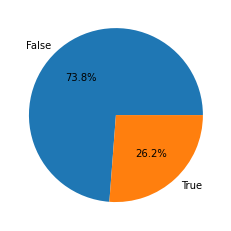

In [ ]:
plt.pie(data.Churn.value_counts(), labels = ["False", "True"], autopct='%1.1f%%')
pass

Можно сделать *вывод* о том, что выборка несбалансированна

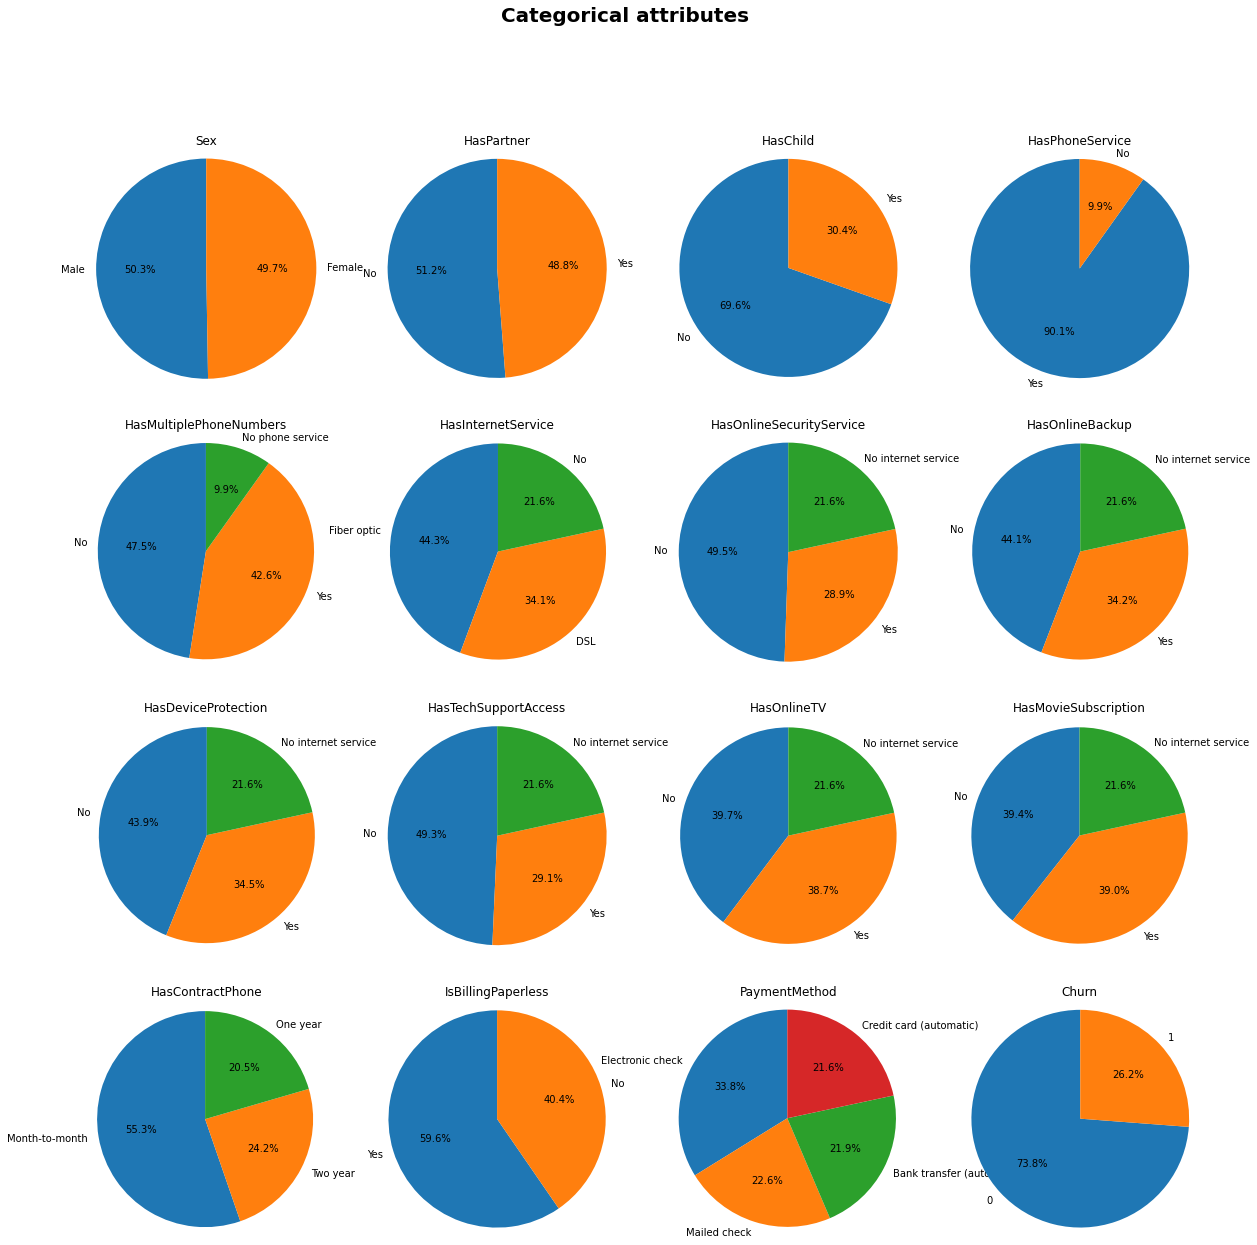

In [ ]:
cat_cols.append("Churn")
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle("Categorical attributes", fontweight="bold", fontsize = 20)
for i, col in enumerate(cat_cols):
    column_values = data[col].value_counts()
    labels = column_values.index
    sizes = column_values.values

    axes[i//4, i%4].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i//4, i%4].axis('equal')
    axes[i//4, i%4].set_title(col)
plt.show()
cat_cols.remove("Churn")

При наличии HasMultiplePhoneNumbers мы можем отказаться от HasPhoneService. "No phone service" можно отнести к значению "No"

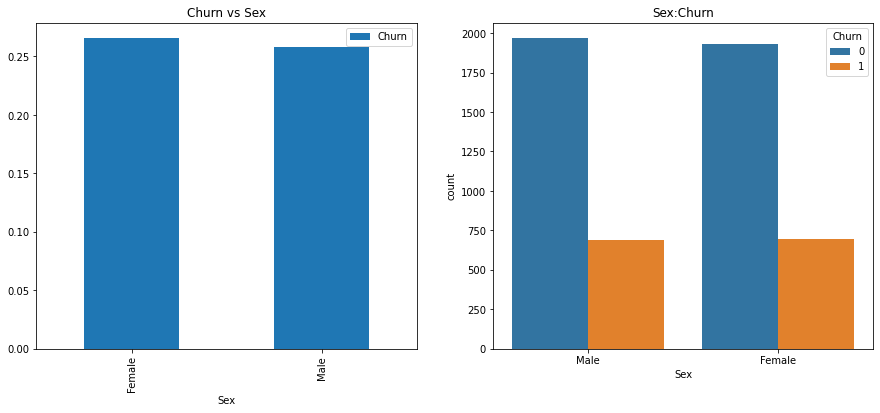

In [ ]:
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(15,6))
data[['Sex','Churn']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Churn vs Sex')
sns.countplot('Sex',hue='Churn',data=data,ax=ax[1])
ax[1].set_title('Sex:Churn')
plt.show()

**Вывод:** отток пользователей не зависит от пола клиента

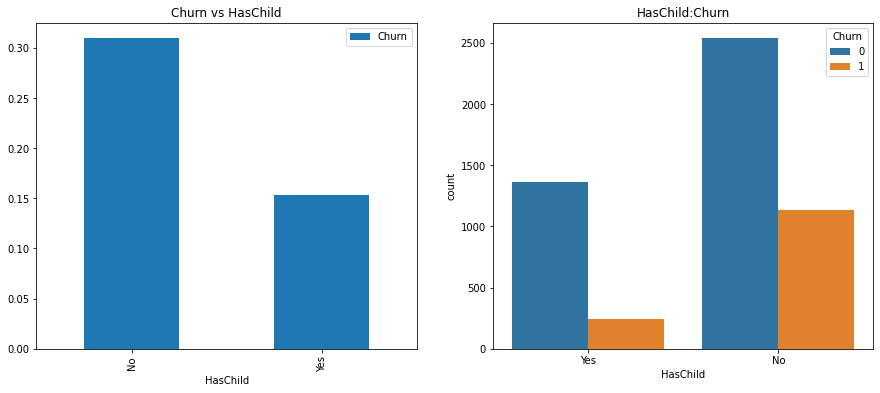

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,6))
data[['HasChild','Churn']].groupby(['HasChild']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Churn vs HasChild')
sns.countplot('HasChild',hue='Churn',data=data,ax=ax[1])
ax[1].set_title('HasChild:Churn')
plt.show()

**Вывод:** вероятность того, что уйдет клиент, у которого нет детей, выше

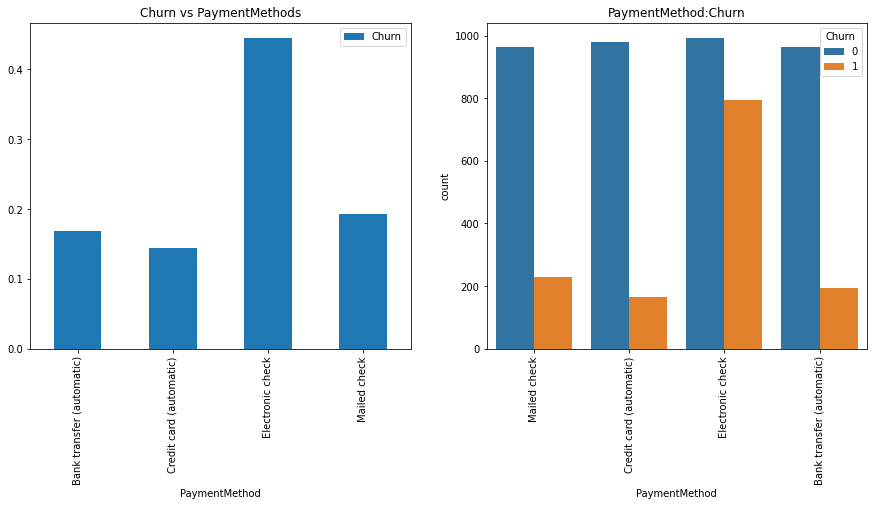

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,6))
data[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Churn vs PaymentMethods')
plt.xticks(rotation='vertical')
sns.countplot('PaymentMethod',hue='Churn',data=data,ax=ax[1])
ax[1].set_title('PaymentMethod:Churn')
plt.show()

**Вывод:** при оплате кредитной картой клиент с большой долей вероятности останется клиентом данного сервиса

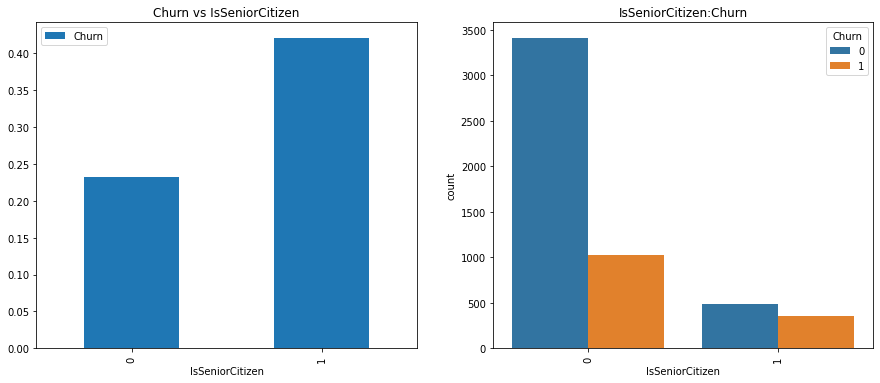

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,6))
data[['IsSeniorCitizen','Churn']].groupby(['IsSeniorCitizen']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Churn vs IsSeniorCitizen')
plt.xticks(rotation='vertical')
sns.countplot('IsSeniorCitizen',hue='Churn',data=data,ax=ax[1])
ax[1].set_title('IsSeniorCitizen:Churn')
plt.show()

**Вывод:** молодые пользователи очень часто покидают данный сервис

Посмотрим на box plot числовых призвнаков:

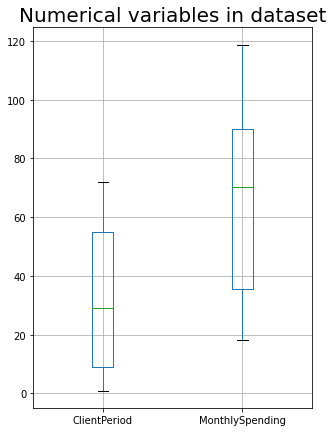

In [ ]:
number_cols = ['ClientPeriod', 'MonthlySpending']
plt.figure(figsize=(5, 7))
data[number_cols].boxplot()
plt.title("Numerical variables in dataset", fontsize=20)
plt.show()

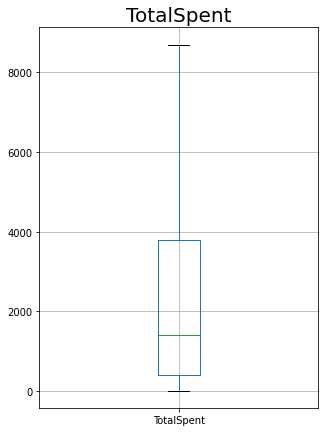

In [ ]:
number_cols = ['TotalSpent']
plt.figure(figsize=(5, 7))
data[number_cols].boxplot()
plt.title("TotalSpent", fontsize=20)
plt.show()

На box plot наблюаем среднее и разброс значений. Среднее значение TotalSpent находится в пределах от 0 до 2000, наибольшее же значение находится около 8000

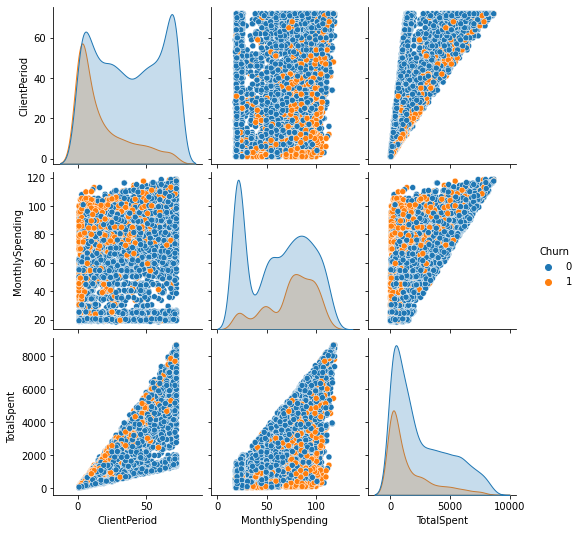

In [ ]:
sns.pairplot(data[num_cols[:3] + [target_col]], hue=target_col);

Из данных графиков видно, что сервис в основном покидали новые пользователи

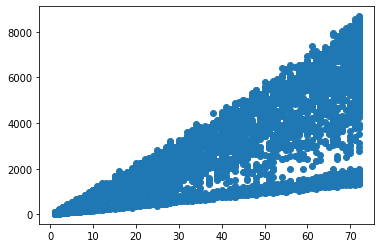

In [ ]:
plt.scatter(data['ClientPeriod'], data['TotalSpent'])

График показывает довольно очевидную вещь: чем дольше человек является пользователем сервиса, тем больше он заплатил 

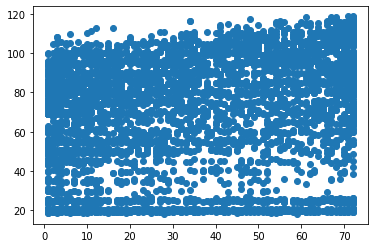

In [ ]:
plt.scatter(data['ClientPeriod'], data['MonthlySpending'])

Можем сделать вывод о том, что новые пользователи платят меньше. Новые пользователи в основном тратят от 60 - 100. Старые пользователи платят больше: от 80 - 120

In [ ]:
corr_mat = data.corr()
corr_mat

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.000000,0.249393,0.826647,0.011532,-0.350713
MonthlySpending,0.249393,1.000000,0.652027,0.215456,0.184769
TotalSpent,0.826647,0.652027,1.000000,0.094628,-0.200061
IsSeniorCitizen,0.011532,0.215456,0.094628,1.000000,0.156872
Churn,-0.350713,0.184769,-0.200061,0.156872,1.000000


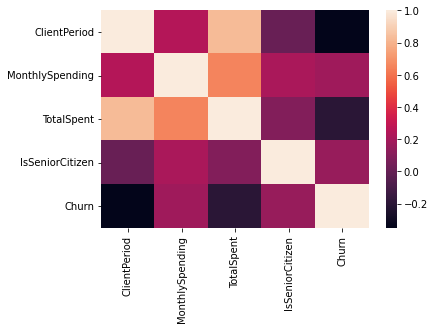

In [ ]:
sns.heatmap(corr_mat)

Total Spent коррелирует с MonthlySpending и TotalSpent

Разделим данные на X и y:

In [ ]:
X = data[num_cols + cat_cols].copy()
y = data['Churn'].copy()

Посмотрим на размерность:

In [ ]:
X.shape, y.shape

((5282, 19), (5282,))

#Предобработка данных

Для предобработки категориальных данных воспользуемся OneHotEncoding и затем нормализуем значения

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

num_transform = Pipeline(steps=[
                    ('scale', MaxAbsScaler())                             
])
cat_transfrom = Pipeline(steps=[
                    ('onehot', OneHotEncoder(handle_unknown = 'ignore')),
                    ('scale', MaxAbsScaler())
])

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers = [
                                    ('cat', cat_transfrom, cat_cols),
                                    ('num', num_transform, num_cols)
])

Разделим выборку на train/test:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [ ]:
X_train.shape, y_train.shape

((4753, 19), (4753,))

In [ ]:
X_test.shape, y_test.shape

((529, 19), (529,))

Применим oversampling для устранения несбалансированности классов:

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=1)

#Построение классификаторов

##Построение линейных моделей

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, ShuffleSplit, RepeatedKFold, cross_val_predict

###LogisticRegression

Обучим Логистическую регрессию и с помощью GridSearch переберем параметр C. GridSearch будем использовать кросс-валидацию с праметром 5.

In [ ]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': [100, 10, 1, 0.1, 0.01, 0.001]}
best_log = GridSearchCV(LogisticRegression(), parameters, scoring='roc_auc', cv = 5)
my_pipeline_log = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('sampling', smt),
                        ('model', best_log)
])

In [ ]:
my_pipeline_log.fit(X_train, y_train)

In [ ]:
my_pipeline_log[2].best_score_

0.8570279059650165

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
my_pipeline_log[2].best_params_

{'C': 100}

In [ ]:
predicted = my_pipeline_log.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.8736136614028646

Результаты **LogisticRegression**:


*   Значение roc-auc на кросс-валидации: 0.86
*   Значение roc-auc на тестовой выборке: 0.87



###DecisionTree без undersampling

Обучим Дерево решений с перебором следующих параметров:


*   Max_depth
*   Criterion
*   Max_features
*   Min_samples_split
*   Splitter


In [ ]:
from sklearn.tree import DecisionTreeClassifier
depth = np.arange(10, 50)
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': depth,
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [5, 10, 20],
              'splitter': ['best', 'random']
             }
best_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_tree = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        
                        ('model', best_tree)
])

In [ ]:
my_pipeline_tree.fit(X_train, y_train)

In [ ]:
my_pipeline_tree[1].best_score_

0.7960914688744696

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
my_pipeline_tree[1].best_params_

{'criterion': 'entropy',
 'max_depth': 11,
 'max_features': 'sqrt',
 'min_samples_split': 20,
 'splitter': 'best'}

In [ ]:
predicted = my_pipeline_tree.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.7792565947242206

Результаты **DecisionTree**:


*   Значение roc-auc на кросс-валидации: 0.8
*   Значение roc-auc на тестовой выборке: 0.78



### DecisonTree

Обучим Дерево решений с перебором следующих параметров:


*   Max_depth
*   Criterion
*   Max_features
*   Min_samples_split
*   Splitter

In [ ]:
from sklearn.tree import DecisionTreeClassifier
depth = np.arange(10, 50)
parameters = {'criterion': ['gini', 'entropy'],
              'max_depth': depth,
              'max_features': ['sqrt', 'log2'],
              'min_samples_split': [5, 10, 20],
              'splitter': ['best', 'random']
             }
best_tree = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_tree = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('smt', smt),
                        ('model', best_tree)
])

In [ ]:
my_pipeline_tree.fit(X_train, y_train)

In [ ]:
my_pipeline_tree[2].best_score_

0.8728179540546692

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
my_pipeline_tree[2].best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'max_features': 'sqrt',
 'min_samples_split': 20,
 'splitter': 'random'}

In [ ]:
predicted = my_pipeline_tree.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.7858328721638075

Результаты **DecisionTree**:


*   Значение roc-auc на кросс-валидации: 0.87
*   Значение roc-auc на тестовой выборке: 0.79



### KNN

Обучим Метод k ближайших соседей с перебором следующих параметров:

*   N_neighbors
*   Weights
*   Metric


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors':np.arange(1, 20), 
              'weights': ['uniform', 'distance'],
              'metric': ['minkowski', 'euclidean'],
              }
best_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_knn = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('sampling', smt),
                        ('model', best_knn)
])

In [ ]:
my_pipeline_knn.fit(X_train, y_train)

In [ ]:
my_pipeline_knn[2].best_score_

0.8846838493114794

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
my_pipeline_knn[2].best_params_

{'metric': 'minkowski', 'n_neighbors': 12, 'weights': 'distance'}

In [ ]:
predicted = my_pipeline_knn.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.7829554995801847

Результаты **KNN**:


*   Значение roc-auc на кросс-валидации: 0.88
*   Значение roc-auc на тестовой выборке: 0.78


## Random Forest

Обучим случайный лес с перебором следующих параметров:

*   Criterion
*   Max_features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
     'criterion':('gini', 'entropy'),
     'max_features': ['sqrt', 'log2'],
}
best_forest = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_rf = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('sampling', smt),
                        ('model', best_forest)
])

In [ ]:
my_pipeline_rf.fit(X_train, y_train)

In [ ]:
my_pipeline_rf[2].best_score_

0.9353836847874669

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
my_pipeline_rf[2].best_params_

{'criterion': 'gini', 'max_features': 'log2'}

In [ ]:
predicted = my_pipeline_rf.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.829293488286294

Результаты **RandomForest**:


*   Значение roc-auc на кросс-валидации: 0.94
*   Значение roc-auc на тестовой выборке: 0.83


##Применение градиентного метода

###Gradient Boosting

Обучим Градиентный метод с перебором следующих параметров:

*   Learning_rate
*   Max_depth
*   N_estimators

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
parameters = {
    "learning_rate": [0.01, 0.02],
    "max_depth": range(5, 10),
    "n_estimators":[100],
}
best_boost = GridSearchCV(GradientBoostingClassifier(), param_grid=parameters, scoring='roc_auc', cv = 5)

In [ ]:
my_pipeline_boost = Pipeline(steps=[
                        ('preprocessing', preprocessing),
                        ('smote', smt),
                        ('model', best_boost)
])

In [ ]:
my_pipeline_boost.fit(X_train, y_train)

In [ ]:
my_pipeline_boost[2].best_score_

0.917395814106525

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
my_pipeline_boost[2].best_params_

{'learning_rate': 0.02, 'max_depth': 9, 'n_estimators': 100}

In [ ]:
predicted = my_pipeline_boost.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, predicted[:, 1])

0.8452437213070483

Результаты **GradientBoosting**:


*   Значение roc-auc на кросс-валидации: 0.92
*   Значение roc-auc на тестовой выборке: 0.85


Получение результатов для **Kaggle**:

In [ ]:
X_test_origin = pd.read_csv('test.csv')
X_test_origin['TotalSpent'] = X_test_origin['TotalSpent'].where(X_test_origin['ClientPeriod'] > 0, X_test_origin['MonthlySpending'])
X_test_origin['ClientPeriod'] = X_test_origin['ClientPeriod'].where(X_test_origin['ClientPeriod'] > 0, 1)
X_test_origin['TotalSpent'] = pd.to_numeric(X_test_origin['TotalSpent'])
submission = pd.read_csv('submission.csv')
submission['Churn'] = my_pipeline_boost.predict_proba(X_test_origin)[:, 1]
submission.to_csv('my_submission.csv', index=False)

### Catboost

Установка **catboost** от Yandex:

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

Получение данных:

In [ ]:
data = pd.read_csv("train.csv")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.1)

 Catboost умеет работать с категориальными признаками, а также нормализует данные, поэтому не делаем предобработки исходных данных

Обучим Catboost с перебором следующих параметров:

*   Learning_rate
*   Depth
*   N_estimators

In [ ]:
boosting_model = CatBoostClassifier(eval_metric='AUC',
                                  silent=True, cat_features=cat_cols)

best_model_info = boosting_model.grid_search({'n_estimators': [50, 70, 100, 150],
                            'learning_rate': [0.01, 0.1, 0.2],
                            'depth' : [3, 5, 7]}, 
                           data.iloc[:, :-1], 
                           data.iloc[:, -1], plot=True, refit=True)

Параметры алгоритма, при которых достигается лучший результат классификации:

In [ ]:
best_model_info['params']

{'depth': 3, 'iterations': 50, 'learning_rate': 0.2}

In [ ]:
from sklearn.metrics import f1_score
y_true = boosting_model.predict_proba(X_test)

Результат catboost на тестовой выборке:

In [ ]:
roc_auc_score(y_test, y_true[:, 1])

0.8234744001511431

In [ ]:
X_test_origin = pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')
submission['Churn'] = boosting_model.predict_proba(X_test_origin)[:, 1]
submission.to_csv('my_submission.csv', index=False)

## Stacking

Применим идею stacking для следующих классификаторов:


*   RandomForest
*   KNN
*   GradientBoosting



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
estimators = [
         ('rf', my_pipeline_rf),
         ('knn', my_pipeline_knn),
         ('boos', my_pipeline_boost)
]

In [ ]:
clf = StackingClassifier(
     estimators=estimators, final_estimator=AdaBoostClassifier()
)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score
y_true = clf.predict_proba(X_test)

Результат stacking на тестовой выборке:

In [ ]:
roc_auc_score(y_test, y_true[:, 1])

0.845277477720767

# Предсказания

In [ ]:
X_test_origin = pd.read_csv('test.csv')
X_test_origin['TotalSpent'] = X_test_origin['TotalSpent'].where(X_test_origin['ClientPeriod'] > 0, X_test_origin['MonthlySpending'])
X_test_origin['ClientPeriod'] = X_test_origin['ClientPeriod'].where(X_test_origin['ClientPeriod'] > 0, 1)
X_test_origin['TotalSpent'] = pd.to_numeric(X_test_origin['TotalSpent'])
submission = pd.read_csv('submission.csv')
submission['Churn'] = my_pipeline_tree.predict_proba(X_test_origin)[:, 1]
submission.to_csv('my_submission_1.csv', index=False)

##Логистическая регрессия на PyTorch

In [ ]:
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.fit_transform(X_test)

In [ ]:
y_train = y_train.values
y_test = y_test.values

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.utils import shuffle
from torch.autograd import Variable

class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.f1 = nn.Linear(input_dim, 100)
        self.f2 = nn.Linear(100, output_dim)


    def forward(self,x):
        x = self.f1(x)
        x = F.relu(x)
        x = F.dropout(x, p = 0.2)
        x = self.f2(x)
        return  F.sigmoid(x)

In [ ]:
batch_size = 100
batch_no = len(X_train) // batch_size

In [ ]:
X_train.shape

(4753, 45)

In [ ]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for i in range(len(X)//batch_size):
        if i + batch_size >= len(X):
            continue
        ind = perm[i*batch_size : (i+1)*batch_size]
        yield (X[ind], y[ind])

epoch 0: loss 0.5410951375961304, accuracy 0.7585106492042542
epoch 50: loss 0.4682292640209198, accuracy 0.8457446694374084
epoch 100: loss 0.45511582493782043, accuracy 0.8593617081642151
epoch 150: loss 0.44649720191955566, accuracy 0.8651064038276672
epoch 200: loss 0.4422740936279297, accuracy 0.8706383109092712
epoch 250: loss 0.43711012601852417, accuracy 0.8759574294090271
epoch 300: loss 0.437491238117218, accuracy 0.8748936057090759
epoch 350: loss 0.4359050393104553, accuracy 0.8772340416908264
epoch 400: loss 0.43858602643013, accuracy 0.8734042644500732
epoch 450: loss 0.43384474515914917, accuracy 0.8789361715316772


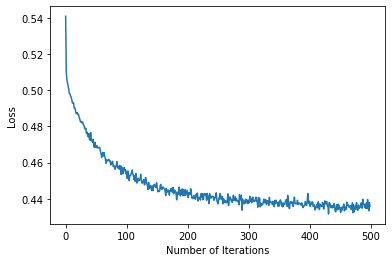

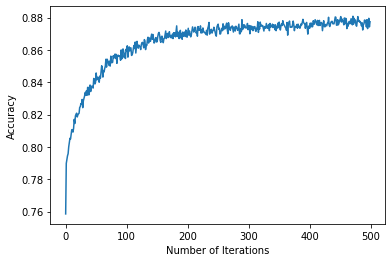

In [ ]:
input_dim = 45
output_dim = 2
learning_rate = 0.01
model = LinearRegression(input_dim,output_dim)
error = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

loss_list = []
acc_list = []
iteration_number = 500

for iteration in range(iteration_number):
    batch_loss = 0
    batch_accur = 0
    temp = 0

    for (x, y) in generate_batches(X_train, y_train, batch_size):
        inputs = Variable(torch.from_numpy(x)).float()
        labels = Variable(torch.from_numpy(y))
            
        optimizer.zero_grad() 

        results = model(inputs)
        
        loss = error(results, labels)

        batch_loss += loss.data
        
        loss.backward()
        
        optimizer.step()

        with torch.no_grad():
            _, pred = torch.max(results, 1)
            batch_accur += torch.sum(pred == labels)
            temp += len(pred)
    
    loss_list.append(batch_loss/batch_no)
    acc_list.append(batch_accur/temp)
    
    if(iteration % 50 == 0):
        print('epoch {}: loss {}, accuracy {}'.format(iteration, batch_loss/batch_no, batch_accur/temp))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()
plt.plot(range(iteration_number),acc_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
X_test_var = Variable(torch.FloatTensor(X_test), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()
print((survived == y_test).sum()/len(survived))

0.7844990548204159


## Получение предсказаний

In [ ]:
X_test_origin = pd.read_csv("test.csv")

In [ ]:
submission = pd.read_csv("submission.csv")

In [ ]:
X_test_origin['TotalSpent'] = X_test_origin['TotalSpent'].where(X_test_origin['ClientPeriod'] > 0, X_test_origin['MonthlySpending'])
X_test_origin['ClientPeriod'] = X_test_origin['ClientPeriod'].where(X_test_origin['ClientPeriod'] > 0, 1)
X_test_origin['TotalSpent'] = pd.to_numeric(X_test_origin['TotalSpent'])

In [ ]:
X_test_origin = preprocessing.fit_transform(X_test_origin)

In [ ]:
X_test_var = Variable(torch.FloatTensor(X_test_origin), requires_grad=True) 
with torch.no_grad():
    test_result = model(X_test_var)
values, labels = torch.max(test_result, 1)
survived = labels.data.numpy()

In [ ]:
X_test_1 = pd.read_csv("test.csv")

In [ ]:
import csv

submission1 = [['Id', 'Churn']]
for i in range(len(survived)):
    submission1.append([submission.Id.loc[i], survived[i]])

In [ ]:
with open('submission1.csv', 'w') as submissionFile:
    writer = csv.writer(submissionFile)
    writer.writerows(submission1)
    
print('Writing Complete!')

Writing Complete!


# AutoML

In [ ]:
!pip install autogluon.tabular[all]

In [ ]:
import pandas as pd
data = pd.read_csv("train.csv")

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(data, test_size = 0.1, random_state = 55)

In [ ]:
from  autogluon.tabular import TabularPredictor

random_state = 55

hyperparameters = {
    'NN': {'num_epochs': 10},
    'GBM': [
        {'extra_trees': True, 'seed': random_state, 'ag_args': {'name_suffix': 'XT'}},
        {},
        'GBMLarge',
    ],
    'CAT': {'random_seed': random_state},
    'XGB': {'seed': random_state},
}

autogluon_predictor = TabularPredictor(
    label = 'Churn',
    eval_metric="roc_auc",
    learner_kwargs={'ignored_columns': ['id']}
).fit(
    train_data = data,
    hyperparameters=hyperparameters,
    presets = 'best_quality'
)

In [ ]:
leaderboard = autogluon_predictor.leaderboard(X_val)

                   model  score_test  score_val  pred_time_test  pred_time_val    fit_time  pred_time_test_marginal  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   LightGBMLarge_BAG_L1    0.963068   0.831120        0.300072       0.216253    8.852575                 0.300072                0.216253           8.852575            1       True          5
1         XGBoost_BAG_L1    0.895298   0.840954        0.520530       0.137007    5.119847                 0.520530                0.137007           5.119847            1       True          4
2        LightGBM_BAG_L1    0.890170   0.843365        0.215665       0.202440    4.782143                 0.215665                0.202440           4.782143            1       True          2
3      LightGBMXT_BAG_L2    0.871173   0.842491        1.557561       1.150812   85.718113                 0.231145                0.215981           5.632747            2       True          7
4      LightGBMXT_BAG_L1    0.

In [ ]:
leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMLarge_BAG_L1,0.963068,0.831120,0.300072,0.216253,8.852575,0.300072,0.216253,8.852575,1,True,5
1,XGBoost_BAG_L1,0.895298,0.840954,0.520530,0.137007,5.119847,0.520530,0.137007,5.119847,1,True,4
2,LightGBM_BAG_L1,0.890170,0.843365,0.215665,0.202440,4.782143,0.215665,0.202440,4.782143,1,True,2
3,LightGBMXT_BAG_L2,0.871173,0.842491,1.557561,1.150812,85.718113,0.231145,0.215981,5.632747,2,True,7
4,LightGBMXT_BAG_L1,0.868297,0.845265,0.224081,0.209998,5.121113,0.224081,0.209998,5.121113,1,True,1
5,WeightedEnsemble_L2,0.864050,0.848917,0.510165,0.584836,67.523249,0.004351,0.003265,1.410305,2,True,6
6,LightGBM_BAG_L2,0.858109,0.842841,1.535177,1.140371,85.485974,0.208760,0.205540,5.400608,2,True,8
7,WeightedEnsemble_L3,0.857972,0.847955,2.450590,1.681037,171.592878,0.004443,0.002961,1.461715,3,True,12
8,XGBoost_BAG_L2,0.857886,0.841133,1.867725,1.076165,87.342055,0.541308,0.141334,7.256689,2,True,10
9,LightGBMLarge_BAG_L2,0.857510,0.835310,1.624802,1.156626,91.785385,0.298385,0.221796,11.700019,2,True,11


In [ ]:
test_data = pd.read_csv("test.csv")

In [ ]:
predictions = autogluon_predictor.predict_proba(test_data)

In [ ]:
submit = pd.read_csv("submission.csv")

In [ ]:
predictions.iloc[:, 1]

0       0.050078
1       0.673095
2       0.639743
3       0.019725
4       0.012005
          ...   
1756    0.150938
1757    0.017809
1758    0.823612
1759    0.570511
1760    0.018176
Name: 1, Length: 1761, dtype: float64

In [ ]:
submit.Churn = predictions.iloc[:, 1]

In [ ]:
submit.to_csv("submit.csv", index = False)

# Заключение

После предобработки данных и построения классификаторов можно сделать ряд следующих выводов:


*   Линейные модели обучаются гораздо быстрее градиентных, однако их результаты на данной задаче значительно хуже
*   Применение undersampling помогло улучшить точность классификации
*   При использовании undersampling значения на train выборке довольно сильно отличаются от test, так как балансировка происходит только для train. При отсутствии undersampling значение метрики отличается на пару процентов, что соответсвует отсутствию переобучения 
*   Самый лучший результат показывают следующие классификаторы: Gradient Boosting и Catboost, а также логистическая регрессия
*   Кроме того, очень хороший результат можно добиться использованием AutoML
*   Лучший результат на Kaggle - 0.85363 (Top 11%)
